## Васильев Семён. 520 группа

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data

comex.GC_200216_220216.csv    LME.Lead_200216_220216.csv
comex.SI_200216_220216.csv    NYMEX.PA_200216_220216.csv
ICE.BRN_200216_220216.csv     NYMEX.PL_200216_220216.csv
LME.Copper_200216_220216.csv  SANDP-500_200216_220216.csv


In [3]:
def read_data(f_name, name):
    df = pd.read_csv(f_name, sep=',')
    df = df[['<DATE>', '<CLOSE>']]
    df.columns = ['date', name]
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [4]:
def autocorr(ts, lags=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax, adjusted=True, alpha=0.05)
    plt.show()

Загрузка данных.

In [5]:
pa = read_data('data/NYMEX.PA_200216_220216.csv', 'pa')
sandp500 = read_data('data/SANDP-500_200216_220216.csv', 'sandp500')
gold = read_data('data/comex.GC_200216_220216.csv', 'gold')
brent = read_data('data/ICE.BRN_200216_220216.csv', 'brent')
pl = read_data('data/NYMEX.PL_200216_220216.csv', 'pl')
lead = read_data('data/LME.Lead_200216_220216.csv', 'lead')
copper = read_data('data/LME.Copper_200216_220216.csv', 'copper')
silver = read_data('data/comex.SI_200216_220216.csv', 'silver')

Объединение и синхронизация по времени.

In [6]:
full = pa
full = full.merge(sandp500, left_on='date', right_on='date')
full = full.merge(gold, left_on='date', right_on='date')
full = full.merge(brent, left_on='date', right_on='date')
full = full.merge(pl, left_on='date', right_on='date')
full = full.merge(lead, left_on='date', right_on='date')
full = full.merge(copper, left_on='date', right_on='date')
full = full.merge(silver, left_on='date', right_on='date')
full.index = full['date']
full.drop(['date'], axis=1, inplace=True)
full

,pa,sandp500,gold,brent,pl,lead,copper,silver
date,,,,,,,,
2020-02-18,2540.0,3370.29,1603.7,57.68,995.6,1965.50,5754.084300,18.145
2020-02-19,2660.8,3386.15,1613.0,59.34,1011.3,1929.50,5767.312080,18.380
2020-02-20,2614.9,3373.23,1624.8,59.13,986.2,1933.50,5702.275495,18.395
2020-02-21,2614.0,3337.75,1645.9,58.36,976.9,1870.75,5734.242630,18.455
2020-02-24,2541.8,3225.89,1656.1,56.21,965.7,1874.50,5678.024565,18.580
...,...,...,...,...,...,...,...,...
2022-10-02,2246.5,4504.08,1827.3,91.45,1025.2,2290.65,10040.987335,23.190
2022-11-02,2313.0,4418.64,1860.6,95.10,1026.1,2286.55,9791.864145,23.600
2022-02-14,2359.0,4401.67,1873.0,95.85,1029.8,2311.50,9867.923880,23.900


Переход к логарифмическим доходностям.

In [7]:
for col in full.columns:
    full[col].iloc[1:] = np.log(
            full[col].iloc[1:].values / full[col].iloc[:-1].values
        )
full = full.iloc[1:, :]
full

,pa,sandp500,gold,brent,pl,lead,copper,silver
date,,,,,,,,
2020-02-19,0.046463,0.004695,0.005782,0.028373,0.015646,-0.018486,0.002296,0.012868
2020-02-20,-0.017401,-0.003823,0.007289,-0.003545,-0.025133,0.002071,-0.011341,0.000816
2020-02-21,-0.000344,-0.010574,0.012903,-0.013108,-0.009475,-0.032992,0.005590,0.003256
2020-02-24,-0.028009,-0.034088,0.006178,-0.037536,-0.011531,0.002003,-0.009852,0.006750
2020-02-25,0.030493,-0.030748,-0.008611,-0.035123,-0.031451,0.020069,-0.003111,-0.030603
...,...,...,...,...,...,...,...,...
2022-10-02,-0.016117,-0.018282,-0.003278,-0.003820,-0.009417,0.016906,-0.013521,-0.004518
2022-11-02,0.029172,-0.019152,0.018060,0.039137,0.000877,-0.001791,-0.025124,0.017526
2022-02-14,0.019692,-0.003848,0.006642,0.007855,0.003599,0.010853,0.007738,0.012632


Обучение модели на всех предикторах.

In [8]:
Y = full['pa']
X = full[full.columns[1:]]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res = model.fit()

In [9]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     pa   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     38.63
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           4.39e-43
Time:                        16:45:28   Log-Likelihood:                 1167.9
No. Observations:                 495   AIC:                            -2320.
Df Residuals:                     487   BIC:                            -2286.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.400      0.6

Предикторы brent, pl, silver значимы. Модель не вырождена. Выводы на основании p-value T-теста и F-теста.

Исследование автокорреляции.

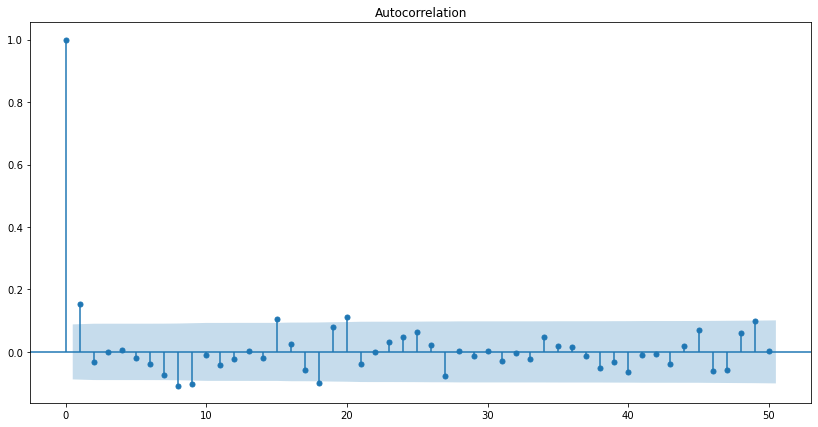

In [10]:
autocorr(res.resid, lags=50)

Наблюдается небольшой выход за границы доверительного интервала. Тест Дарбина — Уотсона дает 1.687, что достаточно близко к 2.

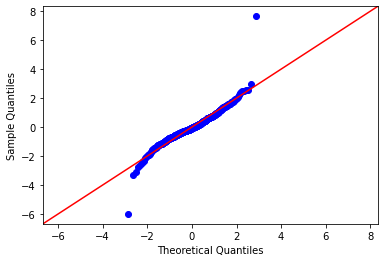

In [11]:
fig = sm.qqplot(res.resid, stats.norm, fit=True, line='45')

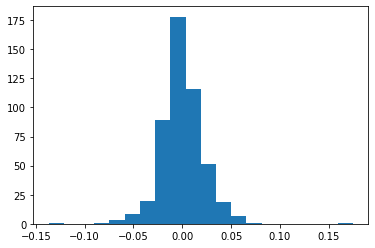

In [12]:
fig = plt.hist(res.resid, bins=20)

In [13]:
stats.shapiro(res.resid).pvalue

7.019925310806311e-15

Судя по тесту распределение остатков близко к нормальному.

Модель на значимых предикторах.

In [14]:
X = X[['const', 'brent', 'pl', 'silver']]
model = sm.OLS(Y, X)
res = model.fit()

In [15]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     pa   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     89.37
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           3.69e-46
Time:                        16:45:28   Log-Likelihood:                 1166.5
No. Observations:                 495   AIC:                            -2325.
Df Residuals:                     491   BIC:                            -2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.425      0.6

Исследование автокорреляции и распределения.

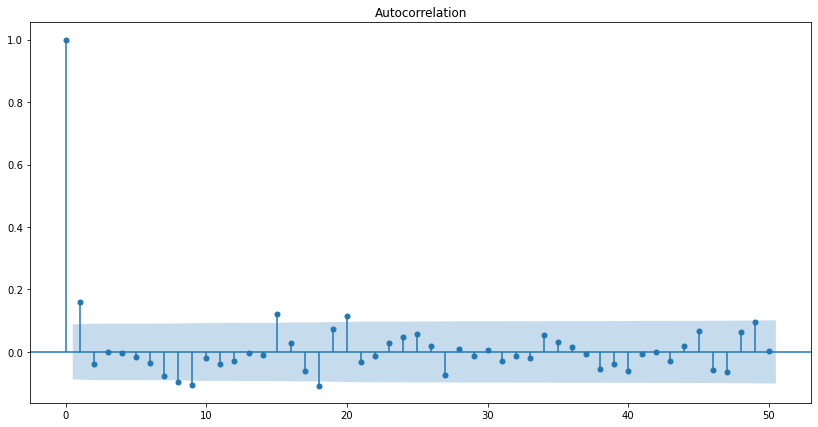

In [16]:
autocorr(res.resid, lags=50)

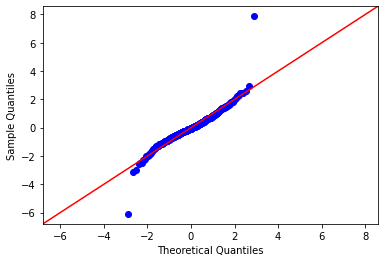

In [17]:
fig = sm.qqplot(res.resid, stats.norm, fit=True, line='45')

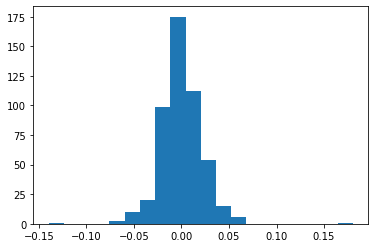

In [18]:
fig = plt.hist(res.resid, bins=20)

In [19]:
stats.shapiro(res.resid).pvalue

3.2522556340581132e-15

Результаты такие же как и у предыдущей модели.